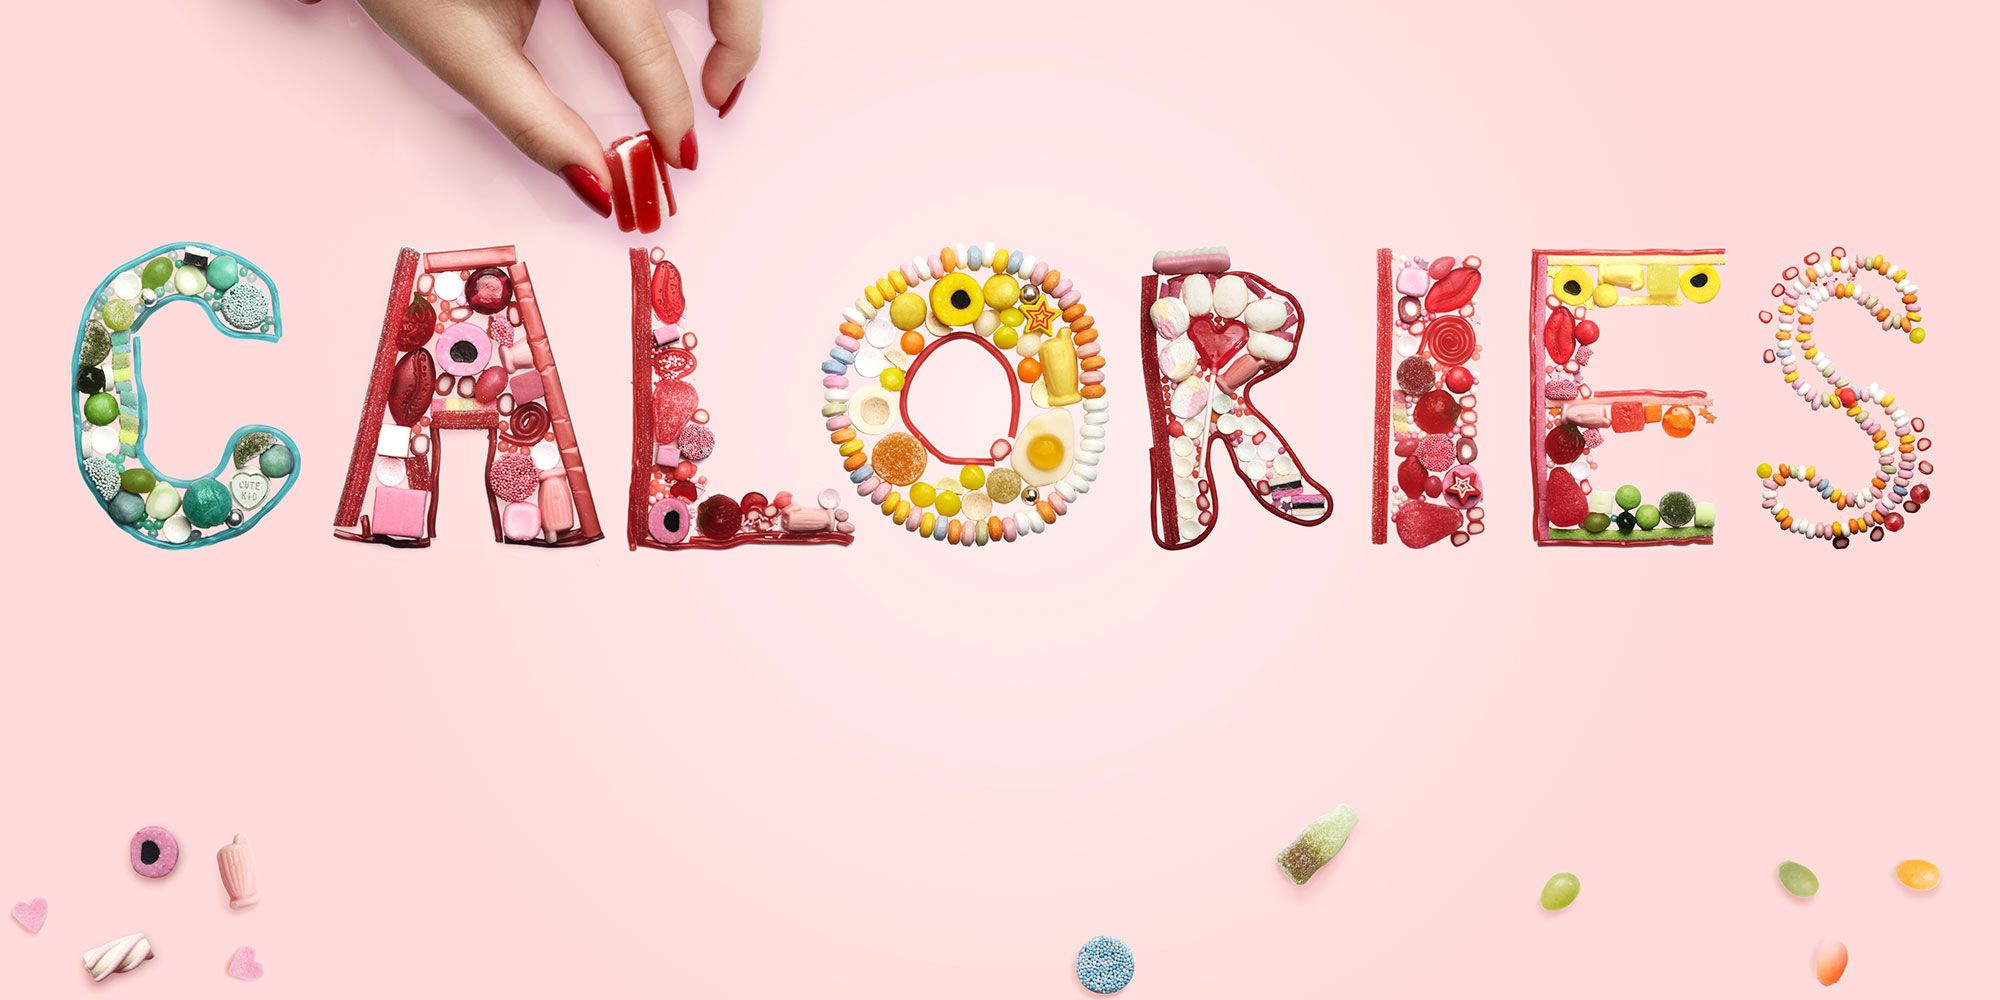

# Calories Burnt Prediction

Data source: https://www.kaggle.com/datasets/ruchikakumbhar/calories-burnt-prediction

### Objective:

Develop a machine learning model using Python which can predict the number of calories a person has burnt during a workout based on some biological measures.

______________________________

### Overview:

Leveraging PandasAI, this notebook creatively integrates Data Science, Machine Learning, and Large Language Models.

It contains three main parts: 1. Data loading and analysis 2. Data preprocessing 3. Modeling and evaluation

_________________________

### Part 1: Data loading and analysis

In [41]:
# Import necessaries for whole project
import os
import pandas as pd
import pandasai as pdai
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
from lightgbm import LGBMRegressor

scaler = StandardScaler() # Instancing from 'StandardScaler' object

In [42]:
pandasai_API_key = 'Your free API key from https://pandabi.ai'
os.environ['PANDASAI_API_KEY'] = pandasai_API_key

In [43]:
# Data loading
try:
    file = pd.read_csv('calories.csv')
    df = file.copy()
except : print('Something went wrong when reading the file!')

In [44]:
df.sample(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
8974,10752745,male,61,196.0,96.0,2.0,73.0,38.5,6.0
13286,17401435,female,67,173.0,70.0,8.0,96.0,39.2,45.0
6319,11909827,male,78,188.0,96.0,11.0,82.0,40.0,55.0
2293,19359509,female,49,164.0,66.0,23.0,101.0,40.5,135.0
13208,13067519,female,36,148.0,53.0,1.0,83.0,37.2,4.0
4195,10728499,female,31,167.0,66.0,28.0,113.0,40.7,192.0
500,11082105,male,34,182.0,80.0,29.0,120.0,40.7,240.0
680,12404748,male,68,195.0,98.0,21.0,105.0,40.4,169.0
2969,14341523,male,21,178.0,81.0,17.0,97.0,40.1,72.0
2415,17497651,female,30,174.0,69.0,14.0,86.0,40.6,55.0


In [45]:
df = df.drop(['User_ID'],axis=1) # Drop unnecessary column

In [46]:
# Create a llm using GPT 3.5 model
llm = pdai.llm.openai.OpenAI(api_token='Your free API key from https://makersuite.google.com')
assistance = pdai.SmartDataframe(df,config={'llm':llm}) # Create the AI assistance

In [47]:
assistance.chat('show top five rows of dataframe') # Instead of df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [48]:
assistance.chat('Show info of dataframe') # Instead of df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [49]:
assistance.chat('Show description of numeric columns') # Instead of df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [50]:
assistance.chat('Show total number of duplicated values in data') # Instead of df.duplicated().sum()

1


In [51]:
assistance.chat('Show number of null values for each column as a dataframe') # Instead of df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

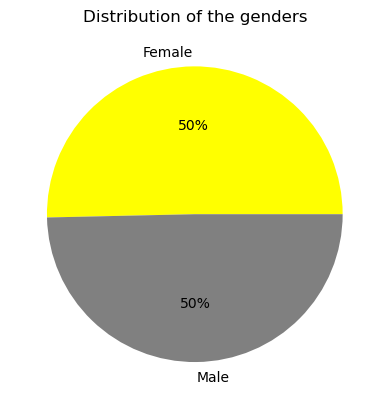

In [53]:
plt.pie(df.Gender.value_counts().values,autopct='%2.f%%',labels=['Female','Male'],colors=['yellow','gray'])
plt.title('Distribution of the genders')
plt.show()

In [54]:
df_male = df[df.Gender=='male']
print('Statiscal analysis where gender is male')
df_male.describe()

Statiscal analysis where gender is male


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000
mean,42.844904,184.667517,86.825702,15.559420,95.630052,40.031153,90.945750
std,17.022752,9.976179,10.180943,8.286255,9.564614,0.773619,66.125478
min,20.000000,142.000000,54.000000,1.000000,67.000000,37.200000,1.000000
25%,28.000000,178.000000,80.000000,8.000000,88.500000,39.600000,34.000000
50%,39.000000,185.000000,87.000000,15.000000,96.000000,40.200000,78.000000
75%,56.000000,191.000000,93.000000,23.000000,103.000000,40.600000,140.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [55]:
df_female = df[df.Gender=='female']
print('Statiscal analysis where gender is female')
df_female.describe()

Statiscal analysis where gender is female


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000,7553.000000
mean,42.735469,164.405931,63.274460,15.502185,95.408579,40.019833,88.153052
std,16.939220,10.089177,8.449548,8.352013,9.601109,0.784733,58.586980
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,2.000000
25%,28.000000,158.000000,57.000000,8.000000,88.000000,39.600000,36.000000
50%,40.000000,164.000000,63.000000,16.000000,95.000000,40.200000,80.000000
75%,56.000000,171.000000,69.000000,23.000000,103.000000,40.600000,135.000000
max,79.000000,205.000000,101.000000,30.000000,122.000000,41.500000,240.000000


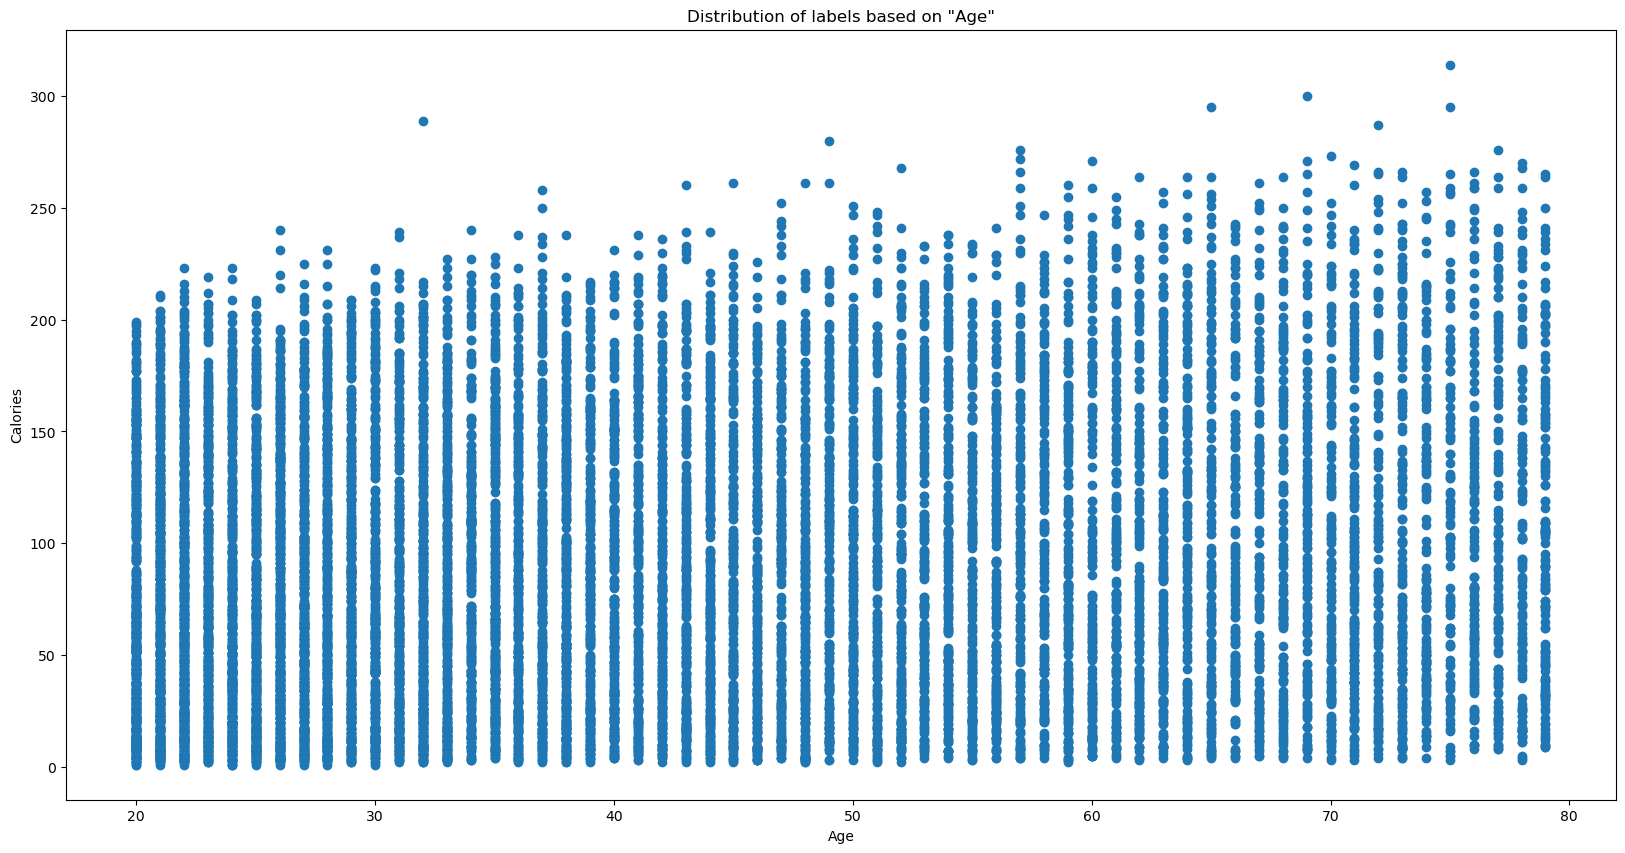

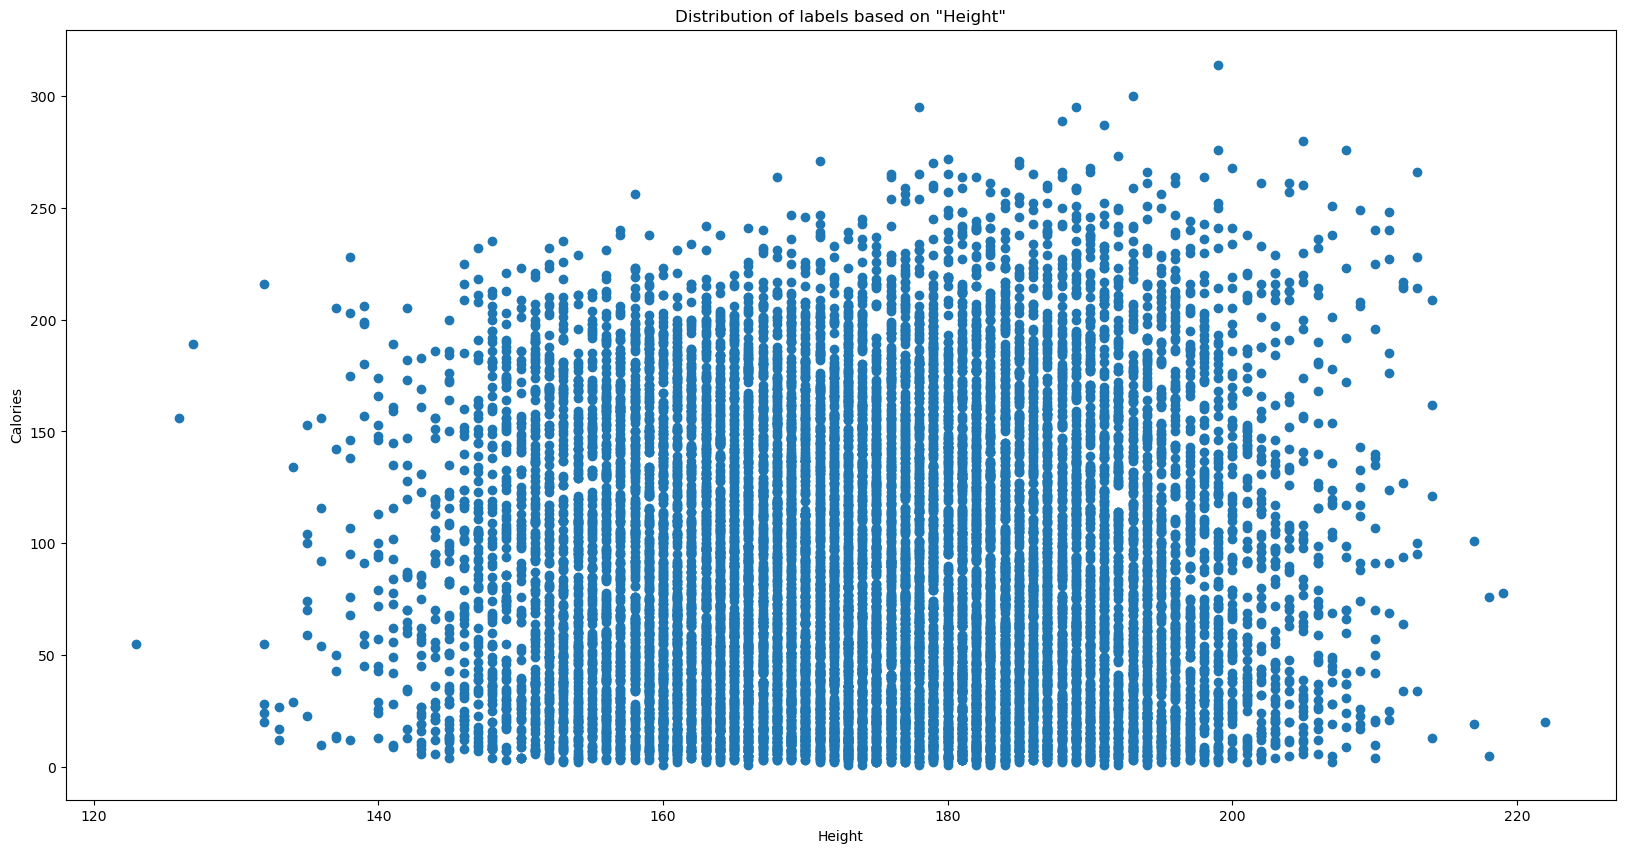

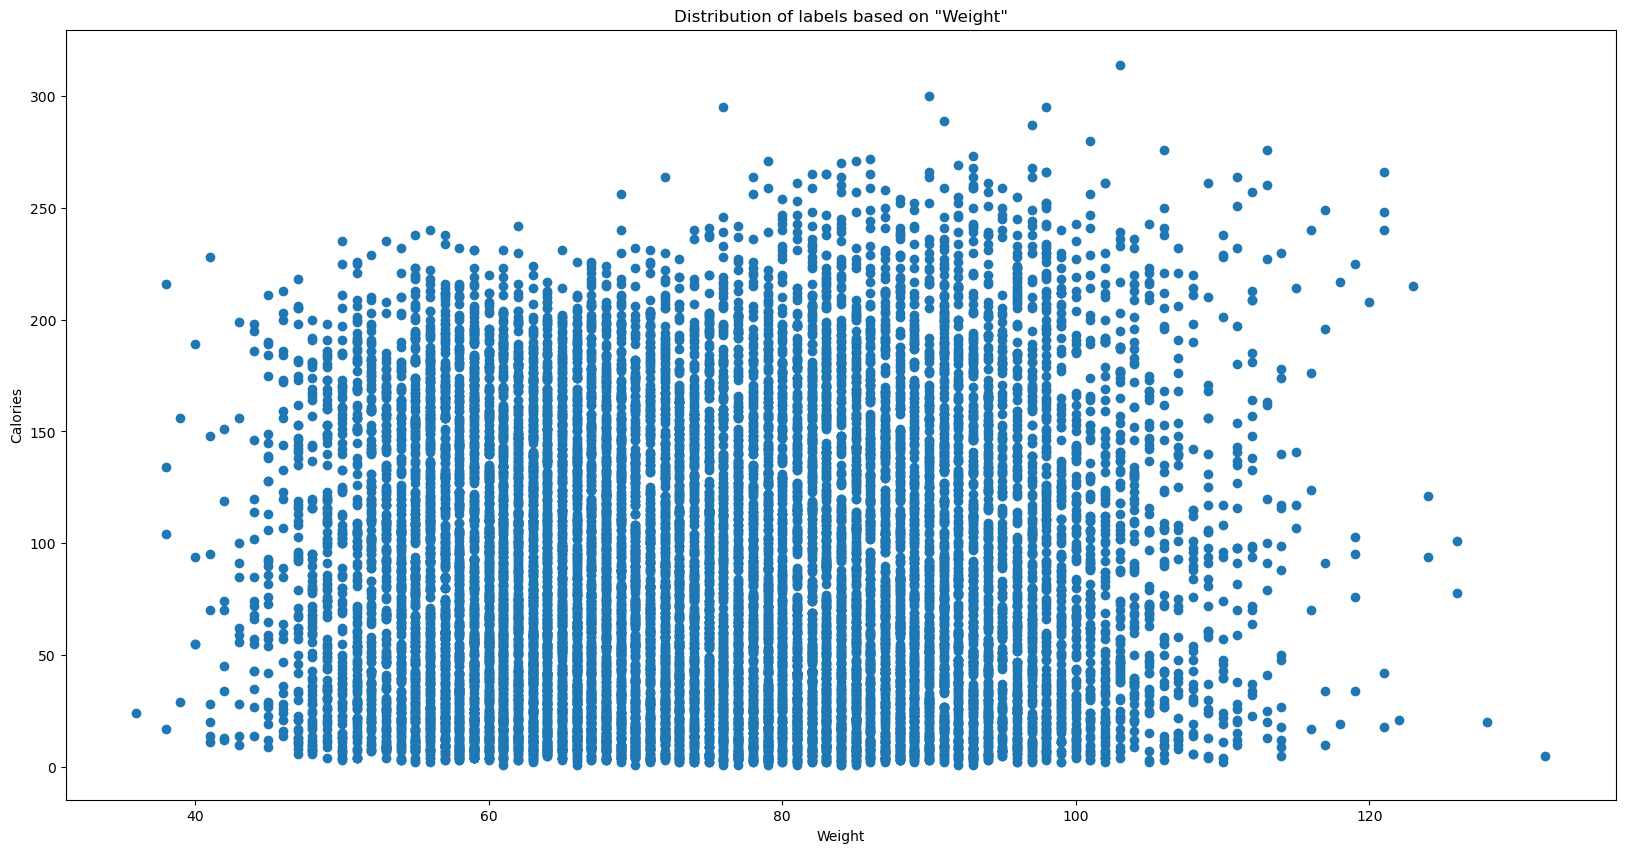

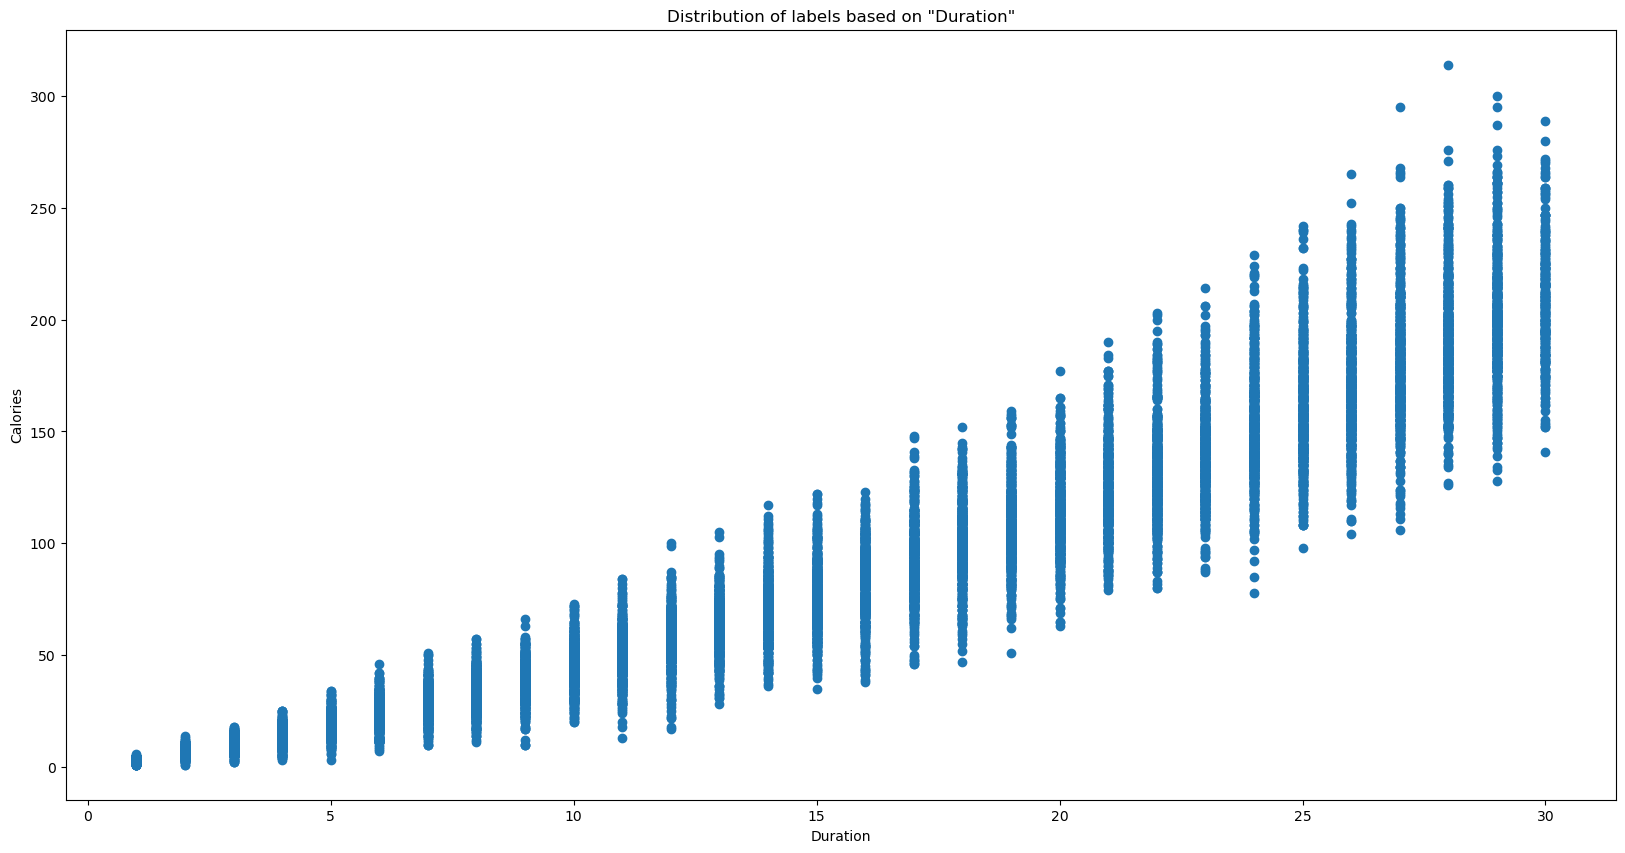

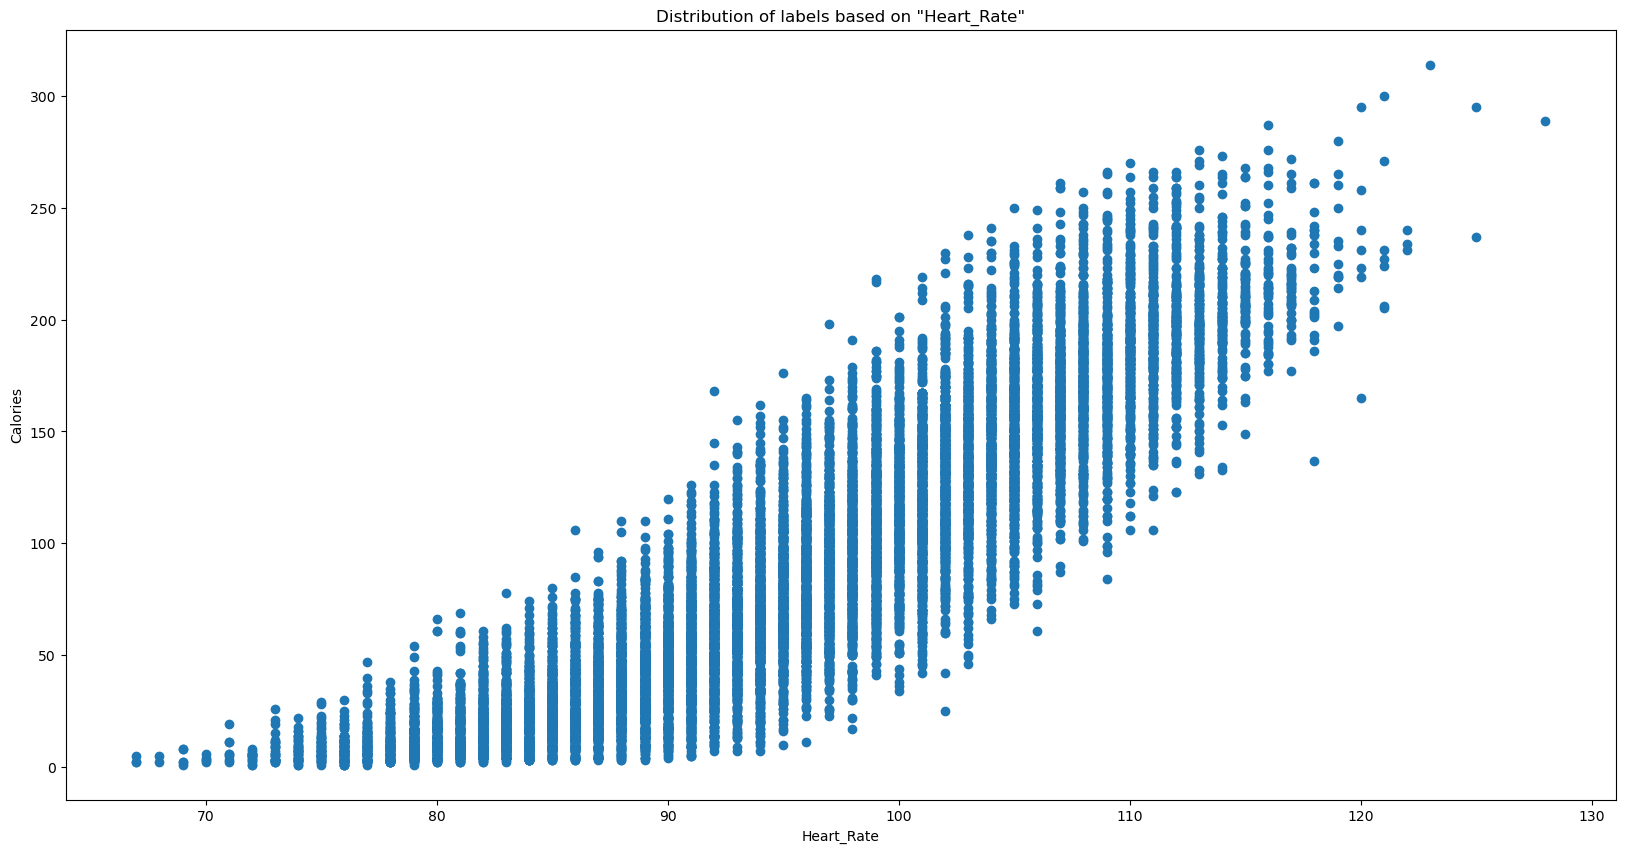

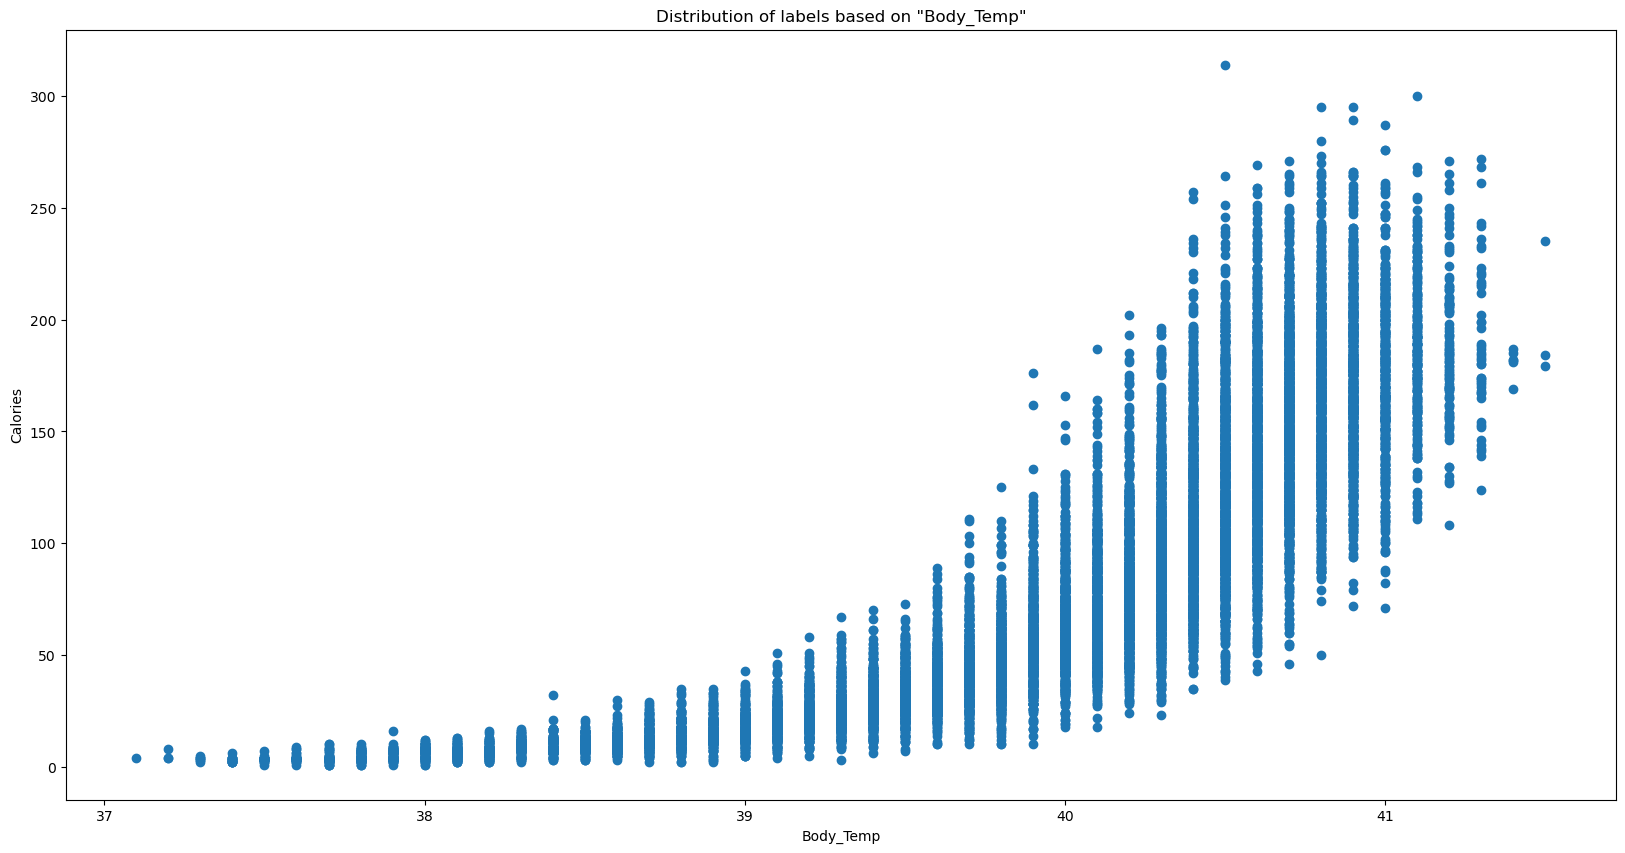

In [100]:
for Col in [col for col in df.columns if df[col].dtype!='O']:
    if Col == 'Calories': continue
    temp_df = df.sort_values(by=Col)
    plt.figure(figsize=(20,10))
    plt.scatter(temp_df[Col],temp_df['Calories'])
    plt.xlabel(Col)
    plt.ylabel('Calories')
    plt.title(f'Distribution of labels based on "{Col}"')
    plt.show()

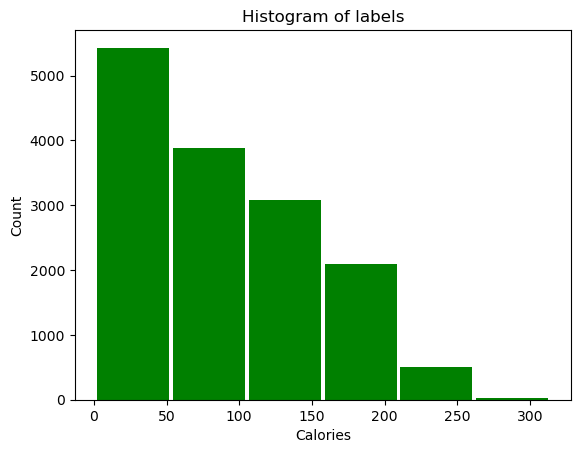

In [56]:
plt.hist(df.Calories,bins=6,rwidth=0.95,color='green')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.title('Histogram of labels')
plt.show()

In [57]:
temp_df = df[[col for col in df.columns if df[col].dtype!='O']] # Create a dataframe with numeric columns

# Calculate Correlation
Corr = temp_df.corr()
Corr['Calories'].sort_values(ascending=False)

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Height        0.017537
Name: Calories, dtype: float64

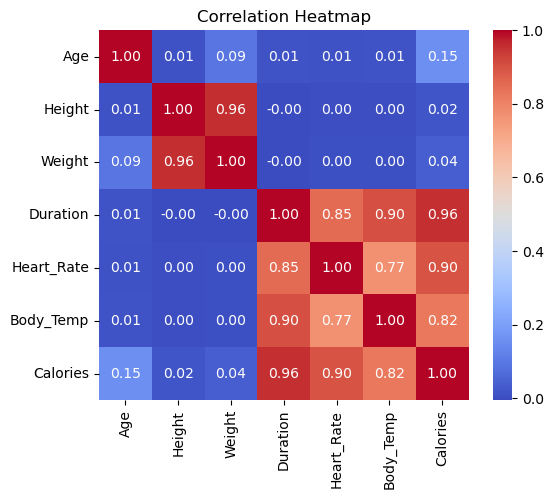

In [58]:
sn.heatmap(Corr,annot=True,fmt='.2f',cmap='coolwarm',square=True)
plt.title('Correlation Heatmap')
plt.show()

________________________

### Part 2: Data preprocessing

In [59]:
assistance.chat('Show columns that include outliers')

,Name
0,Height
1,Weight
2,Heart_Rate
3,Body_Temp
4,Calories


According to the AI's output, outliers are present in the 'Height', 'Weight', 'Heart_Rate', 'Body_Temp', and 'Calories' columns.

So let's check it manually

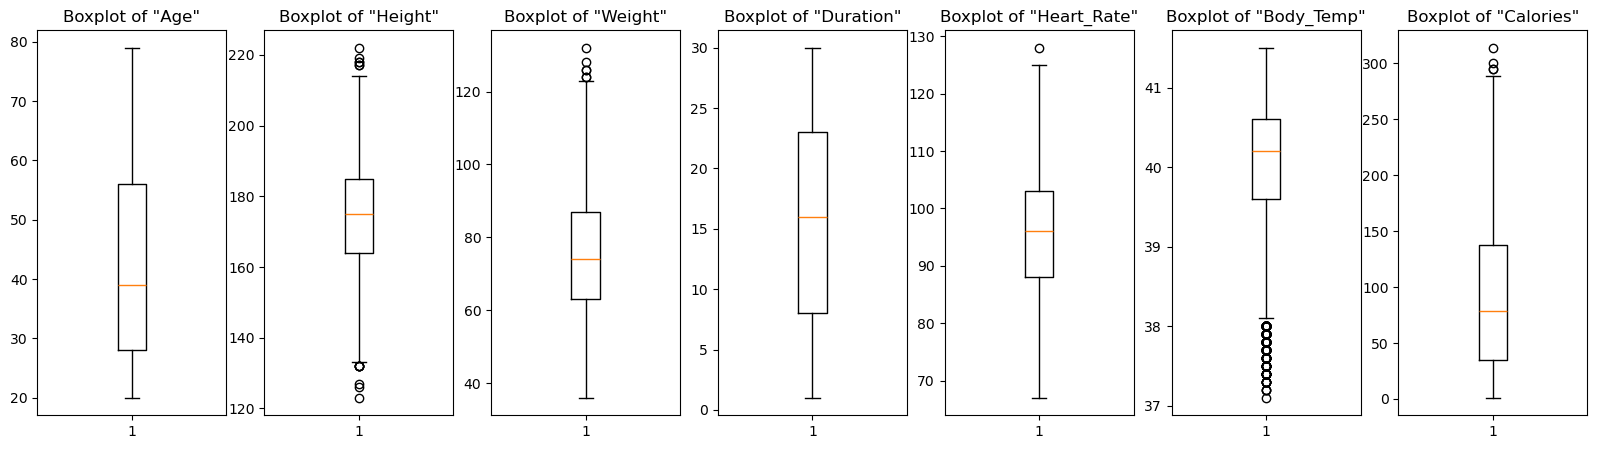

In [60]:
fig, axes = plt.subplots(1,7,figsize=(20,5))
idx = 0
for i,ax in enumerate(axes):
    ax.boxplot(df[temp_df.columns[idx]])
    ax.set_title(f'Boxplot of "{temp_df.columns[idx]}"')
    idx+=1

In [61]:
z_scores = np.abs(stats.zscore(temp_df))
# Identify columns where any Z-score is greater than 3
outliers = (z_scores > 3).any(axis=0)
# Print the columns with potential outliers
print(f"Columns with potential outliers: {temp_df.columns[outliers]}")

Columns with potential outliers: Index(['Height', 'Weight', 'Heart_Rate', 'Body_Temp', 'Calories'], dtype='object')


In [62]:
#Removing outliers from dataframe
z_scores = np.abs(stats.zscore(df[['Height', 'Weight', 'Heart_Rate', 'Body_Temp', 'Calories']]))
# Create a boolean mask to filter out rows where Z-score > 3 in either column
Filter = (z_scores < 3).all(axis=1)
# Filter the DataFrame
df_cleaned = df[Filter]
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

Shape before removing outliers: (15000, 8)
Shape after removing outliers: (14899, 8)


In [63]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14899 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14899 non-null  object 
 1   Age         14899 non-null  int64  
 2   Height      14899 non-null  float64
 3   Weight      14899 non-null  float64
 4   Duration    14899 non-null  float64
 5   Heart_Rate  14899 non-null  float64
 6   Body_Temp   14899 non-null  float64
 7   Calories    14899 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [64]:
# Separate the labels
label = df_cleaned.Calories
df_cleaned = df_cleaned.drop(['Calories'],axis=1)
# Encode the categorical column(Gender) in dataframe
encoded_df = pd.get_dummies(df_cleaned)

In [65]:
assistance2 = pdai.SmartDataframe(encoded_df,config={'llm':llm})

In [79]:
assistance2.chat('Show last 5 rows of dataframe') # Instead of encoded_df.tail()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
14995,20,193.0,86.0,11.0,92.0,40.4,1,0
14996,27,165.0,65.0,6.0,85.0,39.2,1,0
14997,43,159.0,58.0,16.0,90.0,40.1,1,0
14998,78,193.0,97.0,2.0,84.0,38.3,0,1
14999,63,173.0,79.0,18.0,92.0,40.5,0,1


In [81]:
assistance2.chat('Show info of dataframe') # Instead of encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14899 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            14899 non-null  int64  
 1   Height         14899 non-null  float64
 2   Weight         14899 non-null  float64
 3   Duration       14899 non-null  float64
 4   Heart_Rate     14899 non-null  float64
 5   Body_Temp      14899 non-null  float64
 6   Gender_female  14899 non-null  uint8  
 7   Gender_male    14899 non-null  uint8  
dtypes: float64(5), int64(1), uint8(2)
memory usage: 843.9 KB


In [68]:
# Split data into train and test sets.
# 80% of data is considered as train set
xtr , xts , ytr ,yts = train_test_split(encoded_df,label,test_size=0.2,random_state=32)

In [69]:
print(f'Train set shape: {xtr.shape}')
print(f'Test set shape: {xts.shape}')

Train set shape: (11919, 8)
Test set shape: (2980, 8)


In [70]:
scaler.fit(xtr) # Get mean and standard deviation  of train set
# Scale train, test and full data
scaled_train = scaler.transform(xtr)
scaled_test = scaler.transform(xts)
scaled_df = scaler.transform(encoded_df)

__________________

### Part 3: Modeling and evaluation

In [71]:
Result = list() # Initialize an empty list to store the results of model evaluations.

for model in [LinearRegression,RandomForestRegressor,GradientBoostingRegressor,LGBMRegressor]:
    
    teacher = model() # Instantiate an object of the current model.
    teacher.fit(scaled_train,ytr) # Train the model using the scaled training data (scaled_train) and the target training values (ytr).
    
    pred_train = teacher.predict(scaled_train) # Generate predictions on the scaled training data.
    pred_test = teacher.predict(scaled_test) # Generate predictions on the scaled test data.
    pred_df = teacher.predict(scaled_df) # Generate predictions on the full scaled data (scaled_df).

    # Append the model's performance metrics to the Result list.
    # Metrics include:
    #   - Model name 
    #   - Mean Absolute Error (MAE) on the training set.
    #   - Mean Absolute Percentage Error (MAPE) on the training set.
    #   - MAE on the test set.
    #   - MAPE on the test set.
    #   - MAE on the full dataset.
    #   - MAPE on the full dataset.
    Result.append([str(teacher)[:-2],
                   mean_absolute_error(ytr,pred_train),
                   mean_absolute_percentage_error(ytr,pred_train),
                   mean_absolute_error(yts,pred_test),
                   mean_absolute_percentage_error(yts,pred_test),
                   mean_absolute_error(label,pred_df),
                   mean_absolute_percentage_error(label,pred_df)])

# Convert the Result list into a pandas DataFrame.
Result = pd.DataFrame(Result,columns=['Model',
                                      'MAE on train set',
                                      'MAPE on train set',
                                      'MAE on test set',
                                      'MAPE on test set',
                                      'MAE on full data',
                                      'MAPE on full data'])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 11919, number of used features: 8
[LightGBM] [Info] Start training from score 89.989093


In [72]:
Result

,Model,MAE on train set,MAPE on train set,MAE on test set,MAPE on test set,MAE on full data,MAPE on full data
0,LinearRegression,8.280107,0.279836,8.277982,0.261373,8.279682,0.276143
1,RandomForestRegressor,0.673239,0.010307,1.829517,0.026983,0.904510,0.013642
2,GradientBoostingRegressor,2.511291,0.059405,2.642581,0.059676,2.537551,0.059459
3,LGBMRegressor,1.154429,0.022256,1.356862,0.024265,1.194919,0.022658


In [73]:
assistance3 = pdai.SmartDataframe(Result,config={'llm':llm})
assistance3.chat('Which model had the best performance based on [MAE and MAPE]?')

'The RandomForestRegressor had the best performance based on MAE and MAPE.'


_________________

We can see that RandomForestRegressor had the best performance based on MAE and MAPE according to the Result dataframe.

In [74]:
Winner_model = RandomForestRegressor().fit(scaled_train,ytr)
predicts = Winner_model.predict(scaled_df)

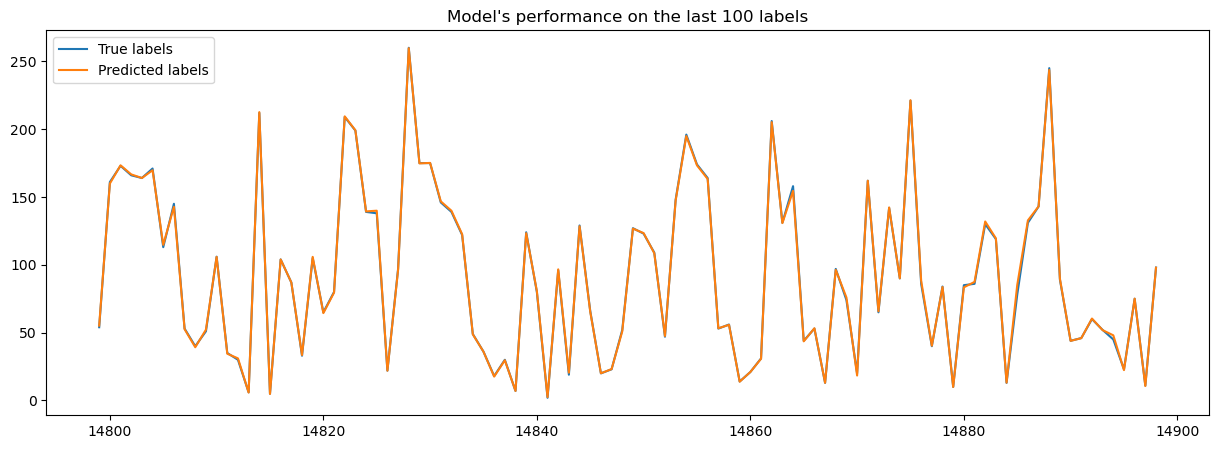

In [75]:
plt.figure(figsize=(15,5))
plt.plot(range(len(label))[-100:],label[-100:])
plt.plot(range(len(label))[-100:],predicts[-100:])
plt.legend(['True labels','Predicted labels'])
plt.title("Model's performance on the last 100 labels")
plt.show()

In [82]:
# Save the model
with open('Model.pkl','wb') as file: pickle.dump(Winner_model,file)

# End